# Type of errors in machine learning

<a target="_blank" href="https://colab.research.google.com/github/concordia-grad-computing-seminars/data-engineering/blob/main/ML/fundamentals/Errors.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Libraries

In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
%matplotlib inline

## Functions

In [2]:
def plot_data(x, y):
    """
    Plots a dataset
    """
    plt.plot(x, y, "k.", markersize=15, markerfacecolor='white')
    plt.xlim([-0.1, 2.1])
    plt.xlabel('$x$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.show()

## Reference process

We consider a process which follows the law $h(x) = w_o + w_1\sin(2\pi x)$

In [3]:
def h(x):
    """
    Reference process
    """
    wo = -1.0
    w1 = +2.0
    return wo + w1*np.sin(2*np.pi*x)

We generate data sets of $m$ points by adding Gaussian noise $\epsilon \sim \mathcal{N}(0,\sigma)$ to the model 

In [4]:
def generateData(m, sigma):
    """
    Generates a dataset of m points with Gaussian noise of variance sigma
    """
    X = np.random.rand(m, 1)*2.0
    y = h(X) + np.random.normal(0, sigma, size=(m, 1))
    return X, y

An example

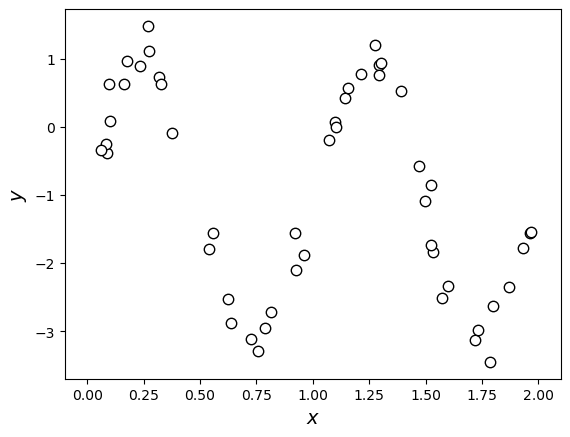

In [5]:
sigma = 0.25
m = 50

X, y = generateData(m, sigma)

plot_data(X, y)

## Training a linear polynomial basis function model

An example

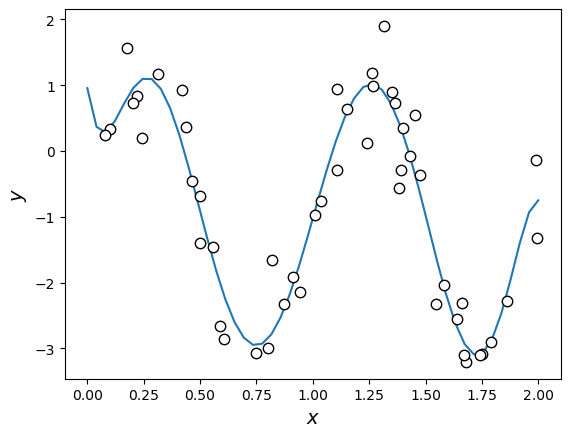

In [7]:
# generate data-set
sigma = 0.5
m = 50
X, y = generateData(m, sigma)

# Fit data-set using LinearRegression class from Scikit-Learn
deg = 7
polyreg = make_pipeline(PolynomialFeatures(deg), LinearRegression())
polyreg.fit(X, y)

# Make some prediction over a set of x-values
X_fit = np.linspace(0, 2).reshape((-1, 1))
y_fit = polyreg.predict(X_fit)

# Plot data-set and fitted model
plt.plot(X_fit, y_fit)
plot_data(X, y)

## Test error

The *test error*, or *generalisation error*, is the to be expected error of an independent example $(X,y)$ when a particular training set $\mathcal{T}$ is used:

$Err_\mathcal{T} = \mathrm{\mathbb{E}}_{(X,y)} \left[ L(Y, \hat{f} (X)) | \mathcal{T}) \right]$

here the function $L(Y, \hat{f} (X))$ is the loss function used to measure the error of the predicted value $\hat f (X)$ of the true value $Y=h(X)$ of the underling process by the trained model over the training set $\mathcal{T}$. 

In [13]:
def test_error(L, h, model):
    """
    Computes test error
    L = loss function
    h = process generating dataset
    model = trained model on dataset
    """
    X = np.linspace(0, 2, 100).reshape((-1, 1))
    return L(h(X), model.predict(X))

For real applications, the test error can not be computed as the underling true process $h(x)$ is not known. One of the problems to adress in machine learning is how one can estimate the test error.

An example for the loss function $L(Y, \hat{f} (X))$ is the mean squared error MSE:

In [8]:
def MSE(y, y_pred):
    """
    Mean squared error MSE
    """
    SE = (y-y_pred)**2
    return SE.mean()

or the root mean squared error RMSE:

In [9]:
def RMSE(y, y_pred):
    """
    Root mean squared error RMSE
    """
    SE = (y-y_pred)**2
    return np.sqrt(SE.mean())

### An example

Training set:

In [10]:
sigma = 0.5
m = 50
X_train, y_train = generateData(m, sigma)

Training a polynomial model

In [11]:
deg = 7
polyreg = make_pipeline(PolynomialFeatures(deg), LinearRegression()).fit(X_train, y_train)

Let's compute the test error for our trained model on our generated dataset using either MSE or RMSE as loss functions:

In [15]:
test_error(MSE, h, polyreg)

0.05571697638437349

In [16]:
test_error(RMSE, h, polyreg)

0.23604443730868452

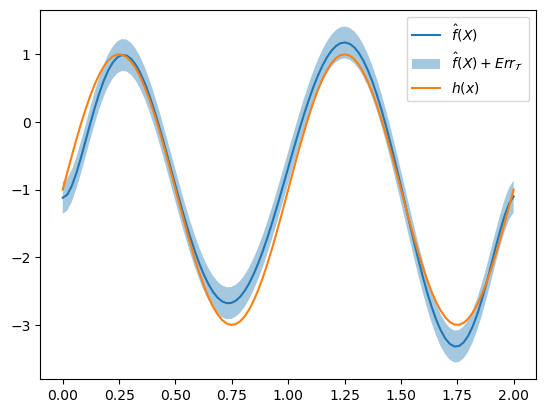

In [17]:
X = np.linspace(0, 2, 100).reshape((-1, 1))
y_pred = polyreg.predict(X).flatten()
y_err = test_error(RMSE, h, polyreg)

plt.plot(X, y_pred, label='$\hat f(X)$')
plt.fill_between(X.flatten(), y_pred-y_err, y_pred+y_err, alpha=0.4, label='$\hat f(X) + Err_\mathcal{T}$')
plt.plot(X, h(X), label='$h(x)$')
plt.legend(loc='upper right')
plt.show()

## Training error

The *training error* is the average loss over all training samples $(x_i, y_i)$ in the training set:

$\overline{err} = \frac{1}{N} \sum \limits_{i=1}^{N} L \left(y_i, \hat f(x_i) \right)$

In [18]:
def training_error(X_train, y_train, L, model):
    """
    Training error
    X_train, y_train: dataset
    L: loss function
    model: trained model on the dataset
    """
    return L(y_train, model.predict(X_train)).mean()

Contrary to the test error, the training error can be evaluated in real applications. Unfortunately, there is no general relation between training and test error. Which means that the training error alone can not be used to estimate the test error. In other words:
<div class="alert alert-block alert-info">
    Evaluating the training error alone does not allow to estimate how the trained model will generalize to new observations.
</div>

### An example

Training set

In [19]:
sigma = 0.5
m = 50
X_train, y_train = generateData(m, sigma)

Training a polynomial model

In [20]:
deg = 15
polyreg = make_pipeline(PolynomialFeatures(deg), LinearRegression()).fit(X_train, y_train)

Training error

In [21]:
training_error(X_train, y_train, RMSE, polyreg)

0.3687573241954247

Note that the training error is in general not the same as the test error:

In [22]:
test_error(RMSE, h, polyreg)

0.2956562473977311

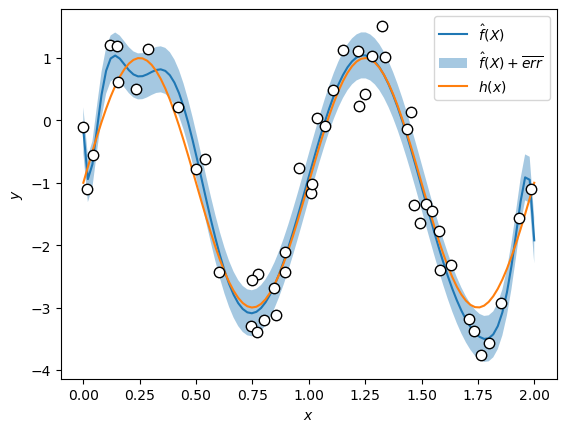

In [24]:
X = np.linspace(0, 2, 100).reshape((-1, 1))
y_pred = polyreg.predict(X).flatten()
y_err = training_error(X_train, y_train, RMSE, polyreg) 

plt.plot(X, y_pred, label='$\hat f(X)$')
plt.fill_between(X.flatten(), y_pred-y_err, y_pred+y_err, alpha=0.4, label='$\hat f(X) + \overline{err}$')
plt.plot(X, h(X), label='$h(x)$')
plt.legend(loc='upper right')
plt.plot(X_train, y_train, "k.", markersize=15, markerfacecolor='white')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

## Expected prediction error

The *expected prediction error*, or *expected test error*, is related to the test error. It is the expected error of an independent example $(X, y)$ averaged over all possible training sets:

$Err = \mathrm{\mathbb{E}}_\mathcal{T} \left[ Err_\mathcal{T} \right] = \mathrm{\mathbb{E}}_{(X,y)} \left[ L(Y, \hat{f} (X)) \right]$

### An example

We generate 1000 training sets and compute their test errors. The expected prediction error will be the average over all these test errors:

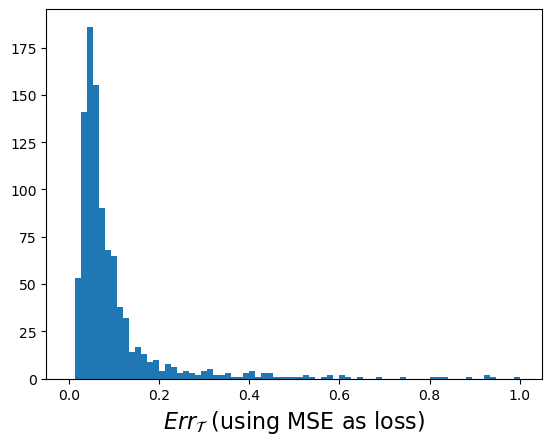

In [25]:
sigma = 0.5
m = 50
deg = 7
testErr = []
trainErr = []

for i in range(1000):
    X_train, y_train = generateData(m, sigma)
    polyreg = make_pipeline(PolynomialFeatures(deg), LinearRegression()).fit(X_train, y_train)
    testErr.append(test_error(MSE, h, polyreg))
    trainErr.append(training_error(X_train, y_train, MSE, polyreg))

plt.hist(testErr, range=[0, 1], bins=75)
plt.xlabel('$Err_\mathcal{T}$ (using MSE as loss)', fontsize = 16)
plt.show()

The expected prediction error is:

In [26]:
np.mean(testErr)

0.15991124015124497

Note that the training errors behave quite differently:

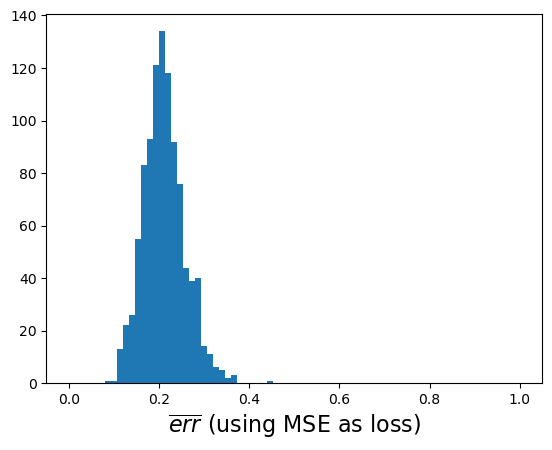

In [27]:
plt.hist(trainErr, range=[0, 1], bins=75)
plt.xlabel('$\overline{err}$ (using MSE as loss)', fontsize = 16)
plt.show()

## Test and training errors in function of model complexity

We compute the test and training error for models of increasing complexity (increasing degree of polynomial) from datasets generated from a same population (i.e. from a same process $h(x)$ with some Gaussian noise added to it).

In [28]:
def errors(deg, sigma=0.1, m=100, n=100):
    """
    Computes test and training error for datasets fit by a polynomial model
    deg   = degree of polynomial model
    sigma = variance of gaussain noise added during datset generation
    m     = number of points in dataset
    n     = number of datasets
    """
    testErr = []
    trainErr = []

    for i in range(n):
        X_train, y_train = generateData(m, sigma)
        polyreg = make_pipeline(PolynomialFeatures(deg), LinearRegression()).fit(X_train, y_train)
        testErr.append(test_error(RMSE, h, polyreg))
        trainErr.append(training_error(X_train, y_train, RMSE, polyreg))

    return testErr, trainErr

In [29]:
d_max = 30

testError = []
trainError = []

for d in range(2, d_max+1):
    test, train = errors(d, 0.1, 125, 1000)
    testError.append(test)
    trainError.append(train)

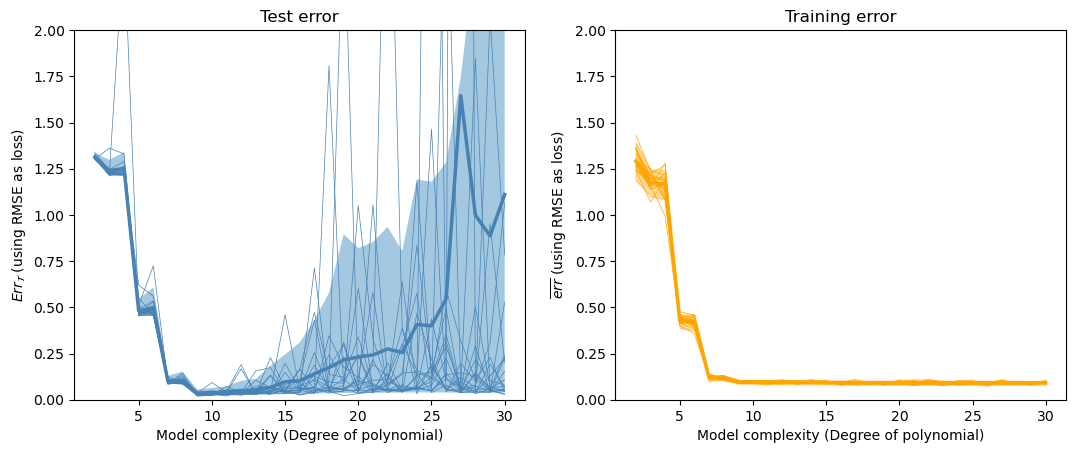

In [30]:
plt.figure(figsize=(12.8, 4.8))

# Test loss
plt.subplot(1, 2, 1)
avg_err = np.mean(testError, axis=1)

plt.plot(range(2, d_max+1), np.array(testError).T[0:19].T, '-', color='steelblue', linewidth=0.5)
plt.plot(range(2, d_max+1), avg_err, '-', color='steelblue', linewidth=2.5)
plt.fill_between(range(2, d_max+1),
                 np.percentile(testError, 5, axis=1),
                 np.percentile(testError, 95, axis=1),
                 alpha=0.4)

plt.ylim(0, 2)
plt.xlabel('Model complexity (Degree of polynomial)')
plt.ylabel('$Err_\\mathcal{T}$ (using RMSE as loss)')
plt.title("Test error")

# Training loss
plt.subplot(1, 2, 2)
avg_err = np.mean(trainError, axis=1)

plt.plot(range(2, d_max+1), np.array(trainError).T[0:19].T, '-', color='orange', linewidth=0.5)
plt.plot(range(2, d_max+1), avg_err, '-', color='orange', linewidth=2.5)
plt.fill_between(range(2, d_max+1),
                 np.percentile(trainError, 5, axis=1),
                 np.percentile(trainError, 95, axis=1),
                 alpha=0.4, color='orange')

plt.ylim(0,2)
plt.xlabel('Model complexity (Degree of polynomial)')
plt.ylabel('$\\overline{err}$ (using RMSE as loss)')
plt.title("Training error")

plt.show()

Note how the training error decreases as we increase the model complexity. If we leave enough freedom to the model (give enough complexity), the training error vanishes (the model will fit almost perfectly the training set). However, such a model will generalize poorly as seen in the increase of the test error with increasing model complexity. This increase is due to the increased variability of the test error as it becomes very sensitive to the particular training set used to train the model.

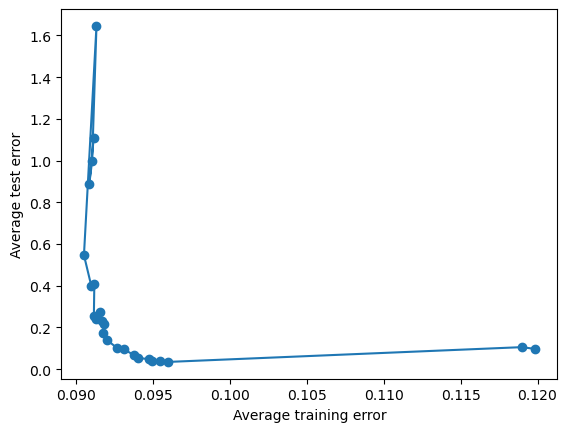

In [34]:
avg_testErr = np.mean(testError, axis=1)
avg_trainErr = np.mean(trainError, axis=1)

plt.plot(avg_trainErr[5:29], avg_testErr[5:29], 'o-')
plt.xlabel('Average training error')
plt.ylabel('Average test error')
plt.show()